# 注意力机制
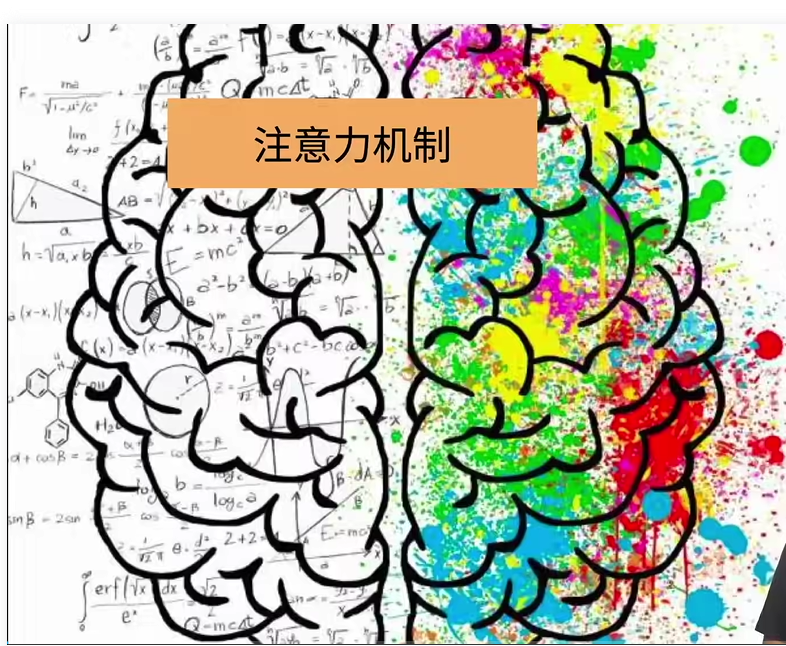

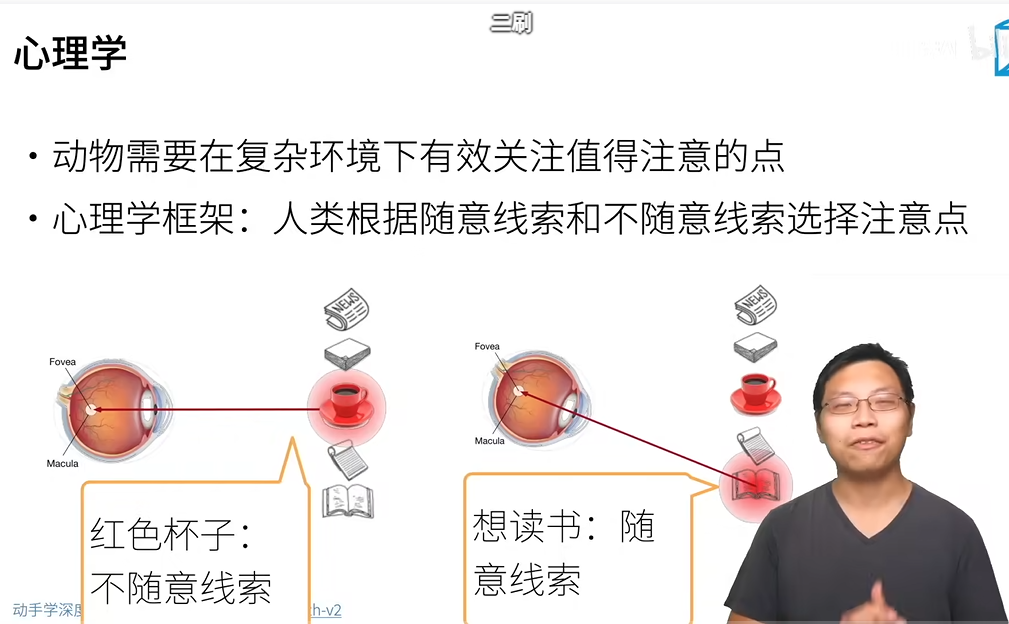

它指的是一些随机的、无特定目的的提示或信息，这些信息可能在某个情况下或某个过程中起到引导的作用。它们可能不具有直接相关性，但在适当的情况下可能引发灵感或帮助解决问题。


考虑一个相对简单的状况，即只使用非自主性提示。要想将选择偏向于感官输入，则可以简单地使用参数化的全连接层，甚至是非参数化的最大汇聚层或平均汇聚层。因此，“是否包含自主性提示”将注意力机制与全连接层或汇聚层区别开来

# 注意力机制

# 也可以叫做注意力池化

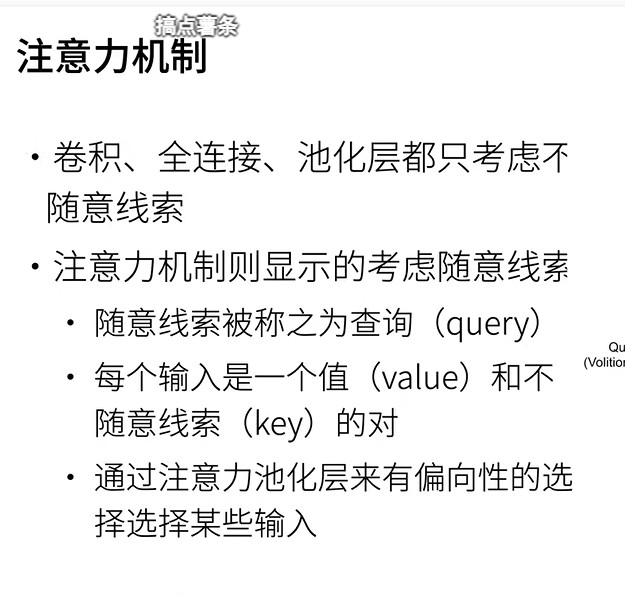


卷积、全连接层、汇聚层通常只考虑不随意线索，因为它们都暴力地将所有数据都直接输入到神经网络中，而不对目标加以区分


注意力机制则考虑随意线索。


显示的建模随意线索

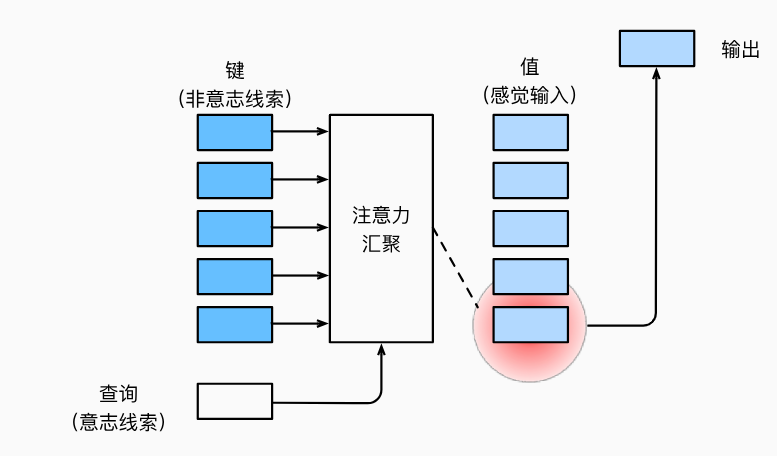


注意力机制通过注意力汇聚将查询（自主性提示）和键（非自主性提示）结合在一起，实现对值（感官输入）的选择倾向，这就是与 CNN 等模型的关键区别

 查询（自主提示）和键（非自主提示）之间的交互形成了注意力汇聚； 注意力汇聚有选择地聚合了值（感官输入）以生成最终的输出

# 非参注意力池化层

有点像KNN

KNN 是一种懒惰学习算法，它不会对训练数据进行显式建模。也就是说，在训练阶段，KNN 并不学习任何模型，而只是存储训练样本

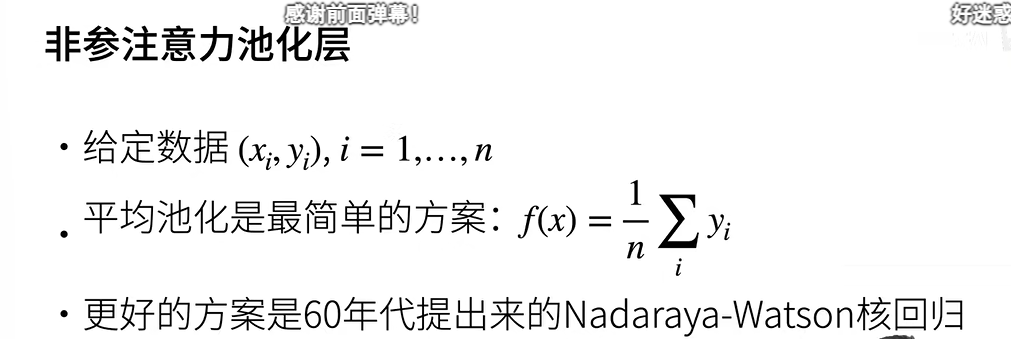

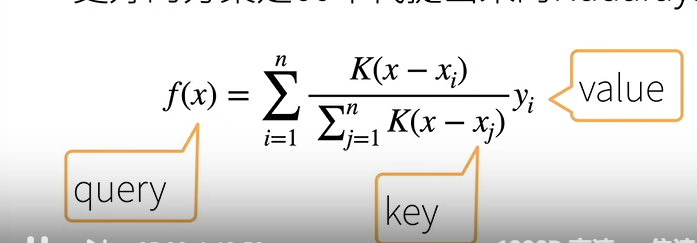

# 现代注意力池化层

没有学习参数

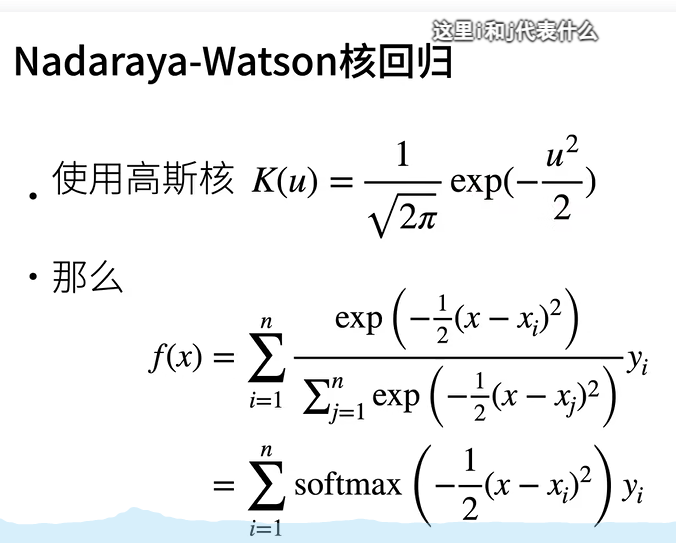

# 参数化的注意力机制

可以学习参数

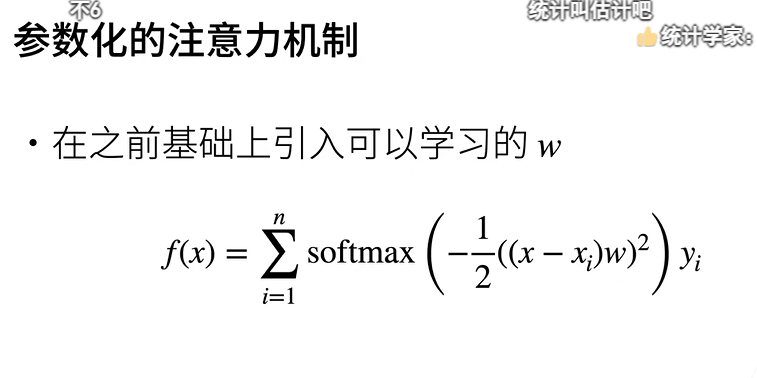



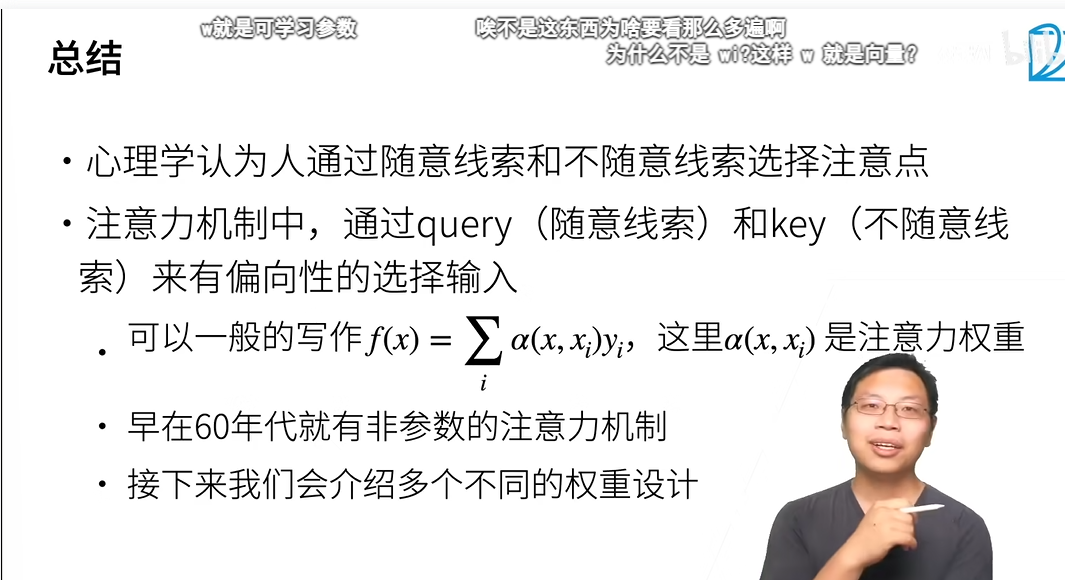

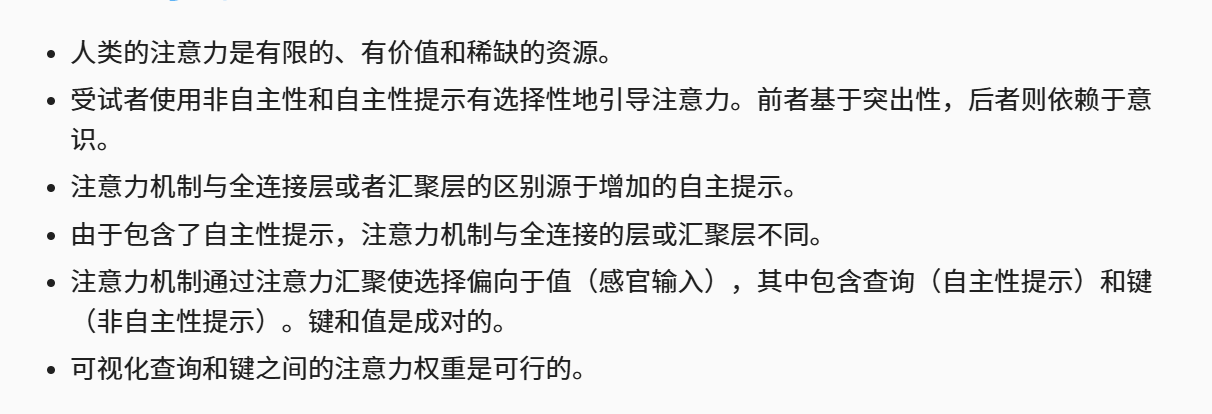

In [6]:
# 注意力汇聚:Nadaraya-Watson核回归

import torch
from torch import nn
from d2l import torch as d2l

In [7]:
# 生成数据集
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本

def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

In [8]:
#画一下这个函数
def plot_kernel_reg(y_hat):
    """绘制核回归的结果
    参数:
    y_hat: 预测的输出值 
    """
    # 使用 d2l.plot 绘制真实值和预测值
    d2l.plot(
        x_test,                     # x 轴数据，用于测试的输入
        [y_truth, y_hat],          # y 轴数据，真实值和预测值
        'x',                        # x 轴标签
        'y',                        # y 轴标签
        legend=['Truth', 'Pred'],  # 图例，其中包含真实值和预测值
        xlim=[0, 5],               # x 轴的范围
        ylim=[-1, 5]               # y 轴的范围
    )

    # 在同一图形上绘制训练数据点
    d2l.plt.plot(
        x_train,                   # 训练数据的 x 值
        y_train,                   # 训练数据的 y 值
        'o',                       # 点的样式为圆圈
        alpha=0.5                  # 点的透明度设置为 0.5
    );

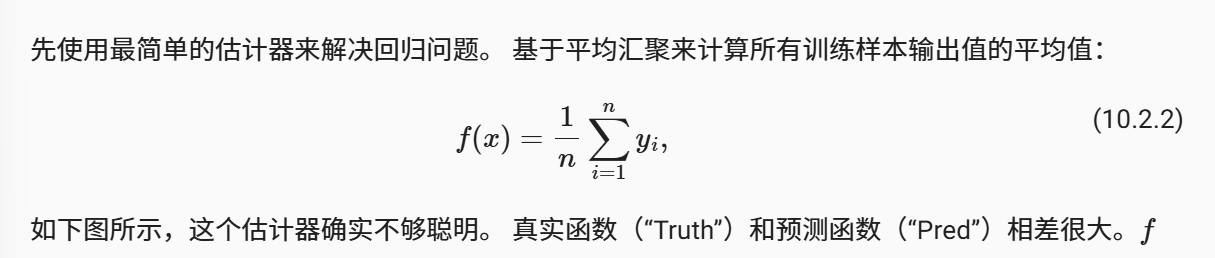

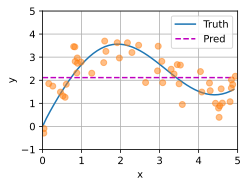

In [9]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

# Nadaraya-Watson核回归是一个非参数模型

非参数的注意力汇聚（nonparametric attention pooling）模型。 接下来，我们将基于这个非参数的注意力汇聚模型来绘制预测结果。 从绘制的结果会发现新的模型预测线是平滑的，并且比平均汇聚的预测更接近真实。

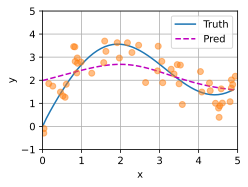

In [10]:
# 非参数注意力汇聚
# 创建 X_repeat，复制测试输入以形成 n_test x n_train 的矩阵
# 这里 n_test 是测试样本数量，n_train 是训练样本数量
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# 结果形状: (n_test, n_train)，每行都是相同的测试输入

# 计算注意力权重
# X_repeat 是 (n_test, n_train) 的矩阵，包含了多个测试输入点
# x_train 是包含键（训练样本输入）的 Tensor，形状也是 (n_train,)
# softmax 函数将注意力权重归一化到 (0, 1) 之间
# 这里使用 -(X_repeat - x_train)**2 来计算相似度，选择相似度高的点获得更高的权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train) ** 2 / 2, dim=1)
# 结果形状: (n_test, n_train)，每一行是给定每个查询的值 (y_train) 之间的注意力权重。
# torch.matmul是 PyTorch 库中的一个函数，用于执行矩阵乘法（或更一般的张量乘法）
# 计算加权平均预测值
# y_hat 的每个元素是使用注意力权重加权后的 y_train
# 使用矩阵乘法计算 y_hat，这里的 y_train 是 (n_train,) 的 Tensor
y_hat = torch.matmul(attention_weights, y_train)
# y_hat 结果形状: (n_test,)，表示每个测试样本的预测值

# 绘制核回归结果
plot_kernel_reg(y_hat)

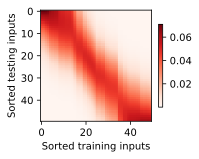

In [11]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

In [12]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
torch.bmm(X, Y).shape
# torch.bmm 是 PyTorch 库中的一个函数，用于执行批量矩阵乘法

torch.Size([2, 1, 6])

In [13]:
# 在注意力机制的背景中，我们可以使用小批量矩阵乘法来计算小批量数据中的加权平均值

weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

tensor([[[ 4.5000]],

        [[14.5000]]])

In [14]:
# 参数的注意力汇聚，使用小批量矩阵乘法， 定义Nadaraya-Watson核回归的带参数版本为：
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        """初始化 NWKernelRegression 模型"""
        super().__init__(**kwargs)
        # 定义一个可训练的权重参数 w，初始化为随机值，形状为 (1,)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))

    def forward(self, queries, keys, values):
        """前向传播函数
        参数:
        - queries: 查询数组，形状为 (查询个数, 特征维度)
        - keys: 键数组，形状为 (键值对个数, 特征维度)
        - values: 值数组，形状为 (键值对个数, 特征维度)

        返回:
        - 对应查询的加权值
        """
        # 将 queries 重复为每个键值对的形式，形状为 (查询个数, 键值对个数)
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))

        # 计算注意力权重，使用 softmax 对每个查询的权重进行归一化
        # 这里计算的是 queries 与 keys 之间的相似度
        self.attention_weights = nn.functional.softmax(
            -((queries - keys) * self.w) ** 2 / 2, dim=1
        )

        # 将注意力权重与值相乘，计算加权平均
        # values 的形状为 (键值对个数, 特征维度)，需要扩展到三维以匹配
        # torch.bmm 处理批量矩阵乘法
        return torch.bmm(
            self.attention_weights.unsqueeze(1),  # 形状为 (查询个数, 1, 键值对个数)
            values.unsqueeze(-1)                   # 形状为 (键值对个数, 特征维度, 1)
        ).reshape(-1)  # 将输出平铺为一维

In [15]:
#训练

# X_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输入
X_tile = x_train.repeat((n_train, 1))
# Y_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输出
Y_tile = y_train.repeat((n_train, 1))
# keys的形状:('n_train'，'n_train'-1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
# values的形状:('n_train'，'n_train'-1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

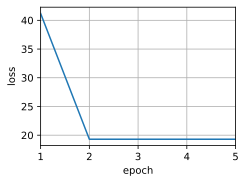

In [16]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train)
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

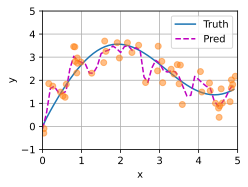

In [17]:
# keys的形状:(n_test，n_train)，每一行包含着相同的训练输入（例如，相同的键）
keys = x_train.repeat((n_test, 1))
# value的形状:(n_test，n_train)
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

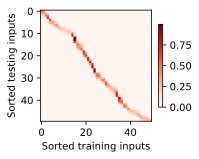

In [18]:
# 为什么新的模型更不平滑了呢？ 下面看一下输出结果的绘制图： 
# 与非参数的注意力汇聚模型相比， 
# 带参数的模型加入可学习的参数后， 曲线在注意力权重较大的区域变得更不平滑


d2l.show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')

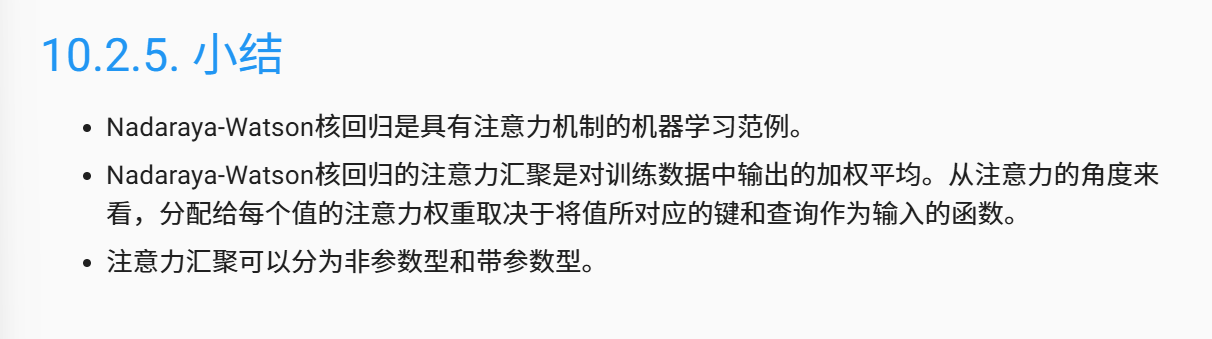